In [37]:
import pandas as pd 
import matplotlib.pyplot as plt

In [38]:
df=pd .read_csv(r"C:\Users\educa\OneDrive\Documents\df3.csv")
df

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,67965.56
1,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
4,house,Yucatán,21.052583,-89.538639,205,105191.37
...,...,...,...,...,...,...
1731,house,Jalisco,20.532264,-103.484418,175,121178.91
1732,house,Morelos,18.928986,-99.180215,100,47417.83
1733,house,Yucatán,21.028404,-89.653006,81,39524.23
1734,house,San Luis Potosí,22.118304,-101.032194,360,245050.24


Which state has the most expensive real estate market?

In [39]:
mean_price_by_state=df.groupby('state')['price_usd'].mean().sort_values(ascending=False)
mean_price_by_state.head(10)

state
Querétaro           133955.913281
Guanajuato          133277.965833
Nuevo León          129221.985663
Distrito Federal    128347.267426
Quintana Roo        128065.416053
Chihuahua           127073.852000
Jalisco             123386.472167
Estado de México    122723.490503
Campeche            121734.633333
Puebla              121732.974000
Name: price_usd, dtype: float64

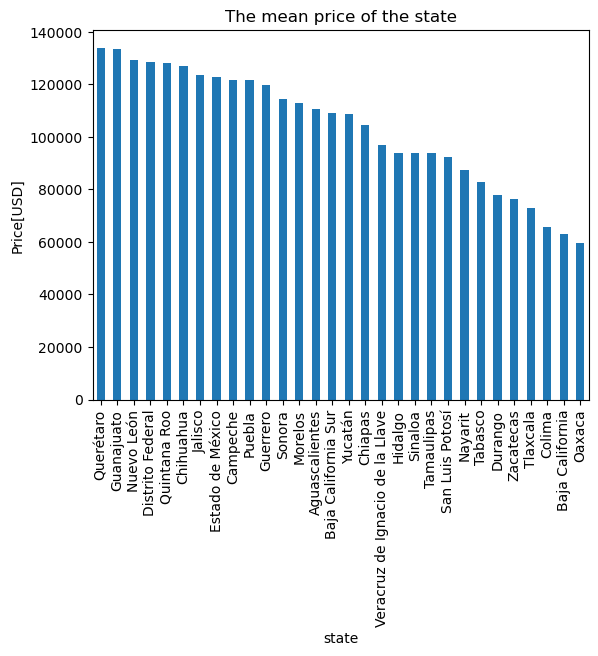

In [40]:
mean_price_by_state.plot(
    kind='bar',
    xlabel='state',
    ylabel='Price[USD]',
    title='The mean price of the state'
);

It seems odd that Querétaro would be the most expensive real estate market in Mexico when, according to recent GDP numbers, it's not in the top 10 state economies. With all the variations in house sizes across states, a better metric to look at would be price per m2. In order to do that, we need to create a new column

In [41]:
df['price_m2']=df['price_usd']/df['area_m2']
df

,property_type,state,lat,lon,area_m2,price_usd,price_m2
0,house,Estado de México,19.560181,-99.233528,150,67965.56,453.103733
1,house,Nuevo León,25.688436,-100.198807,186,63223.78,339.912796
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37,1028.028902
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80,628.725333
4,house,Yucatán,21.052583,-89.538639,205,105191.37,513.128634
...,...,...,...,...,...,...,...
1731,house,Jalisco,20.532264,-103.484418,175,121178.91,692.450914
1732,house,Morelos,18.928986,-99.180215,100,47417.83,474.178300
1733,house,Yucatán,21.028404,-89.653006,81,39524.23,487.953457
1734,house,San Luis Potosí,22.118304,-101.032194,360,245050.24,680.695111


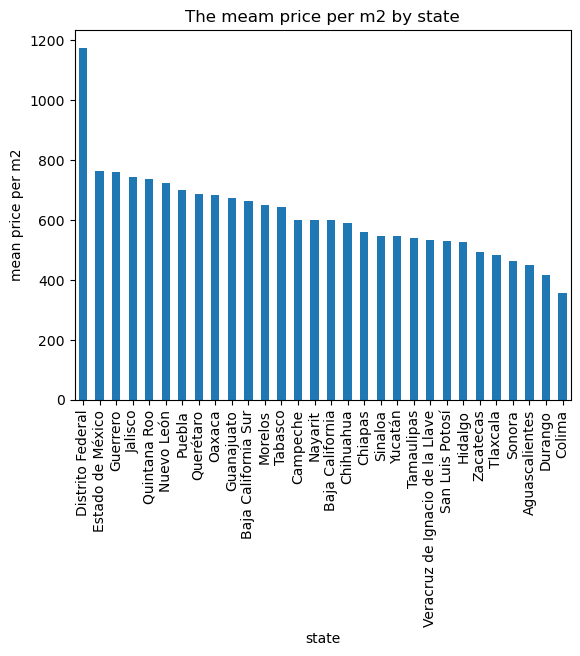

In [42]:
mean_price_m2_by_state=df.groupby('state')['price_m2'].mean().sort_values(ascending=False)
mean_price_m2_by_state.plot(
    kind='bar',
    xlabel='state',
    ylabel='mean price per m2',
    title='The meam price per m2 by state'
);

Now we see that the capital Mexico City (Distrito Federal) is by far the most expensive market. Additionally, many of the top 10 states by GDP are also in the top 10 most expensive real estate markets. So it looks like this bar chart is a more accurate reflection of state real estate markets.

***Is there a relationship between home size and price?***

From our previous question, we know that the location of a home affects its price (especially if it's in Mexico City), but what about home size? Does the size of a house influence price?

A scatter plot can be helpful when evaluating the relationship between two columns because it lets you see if two variables are correlated — in this case, if an increase in home size is associated with an increase in price.

TypeError: 'tuple' object is not callable

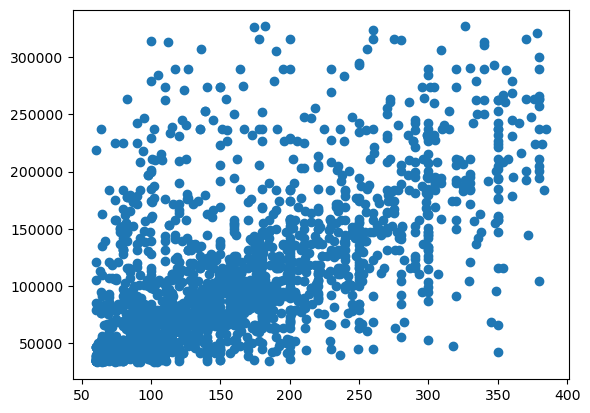

In [43]:
plt.scatter(x=df['area_m2'],y=df['price_usd'])
plt.xlabel('Area[m2]'),
plt.ylabel('Price[USD]'),
plt.title('the price of house due to size')

In [ ]:
# Calculate correlation of "price_usd" and "area_m2"
p_correlation =df["price_usd"].corr(df["area_m2"])

# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (all Mexico):", p_correlation)

The correlation coefficient is over 0.5, so there's a moderate relationship house size and price in Mexico. But does this relationship hold true in every state? Let's look at a couple of states, starting with Morelos.

In [ ]:
# Declare variable `df_morelos` by subsetting `df`
df_Morelos = df[df["state"] == "Morelos"]
df_Morelos.head()

TypeError: 'tuple' object is not callable

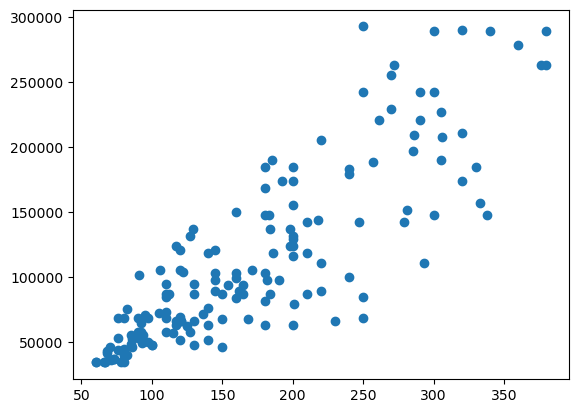

In [47]:
# Create scatter plot of "price_usd" vs "area_m2" in Morelos
plt.scatter(x=df_Morelos["area_m2"], y=df_Morelos["price_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("PRICE [USD]")
plt.title("Morelos: Price vs. Area")


It looks like the correlation is even stronger within Morelos. Let's calculate the correlation coefficient and verify that that's the case.

In [45]:
# Calculate correlation of "price_usd" and "area_m2" in `df_morelos`
p_correlation = df_Morelos["area_m2"].corr(df_Morelos["price_usd"])

# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (Morelos):", p_correlation)

Correlation of 'area_m2' and 'price_usd' (Morelos): 0.8498077608713708


With a correlation coefficient that high, we can say that there's a strong relationship between house size and price in Morelos.

To conclude, let's look at the capital Mexico City (Distrito Federal).

TypeError: 'tuple' object is not callable

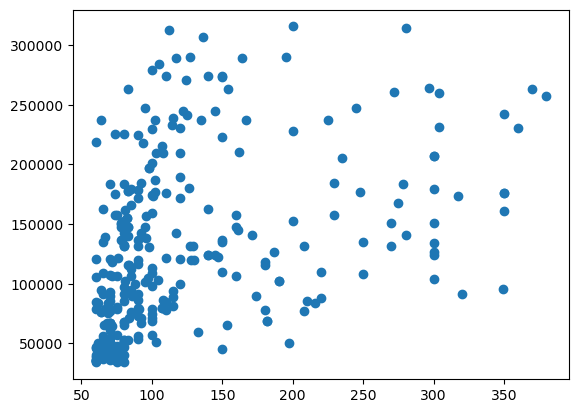

In [46]:
# Declare variable `df_mexico_city` by subsetting `df`
df_mexico_city = df[df["state"]=="Distrito Federal"]

# Create a scatter plot "price_usd" vs "area_m2" in Distrito Federal
plt.scatter(x=df_mexico_city["area_m2"],y=df_mexico_city["price_usd"])

# Add x-axis label
plt.xlabel("Area[sq_meters]")

# Add y-axis label
plt.ylabel("PRICE[USD]")

# Add title
plt.title("Mexico City: Price vs. Area")

# Calculate correlation of "price_usd" and "area_m2" in `df_mexico_city`
p_correlation =df_mexico_city["price_usd"].corr(df_mexico_city["area_m2"])

# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (Mexico City):", p_correlation)

Looking at the scatter plot and correlation coefficient, there's see a weak relationship between size and price. How should we interpret this?

One interpretation is that the relationship we see between size and price in many states doesn't hold true in the country's biggest and most economically powerful urban center because there are other factors that have a larger influence on price. In fact, in the next project, we're going to look at another important Latin American city — Buenos Aires, Argentina — and build a model that predicts housing price by taking much more than size into account.

